# Problem Definition
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

This is a classification problem.


# Data Analysis


In [80]:
import pandas as pd

In [81]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [82]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [84]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [85]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [86]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [87]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [88]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [89]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [90]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [91]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [92]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [93]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [94]:
df['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [95]:
df['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [96]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
le=LabelEncoder()

In [99]:
d1=le.fit_transform(df['Native_country'])
d2=le.fit_transform(df['Race'])
d3=le.fit_transform(df['Relationship'])
d4=le.fit_transform(df['Occupation'])
d5=le.fit_transform(df['Marital_status'])
d6=le.fit_transform(df['Education'])
d7=le.fit_transform(df['Workclass'])
d8=le.fit_transform(df['Sex'])
d9=le.fit_transform(df['Income'])

In [100]:
df['Native_country']=d1
df['Race']=d2
df['Relationship']=d3
df['Occupation']=d4
df['Marital_status']=d5
df['Education']=d6
df['Workclass']=d7
df['Sex']=d8
df['Income']=d9

In [101]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
6,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
7,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
8,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1
9,37,4,280464,15,10,2,4,0,2,1,0,0,80,39,1


In [104]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


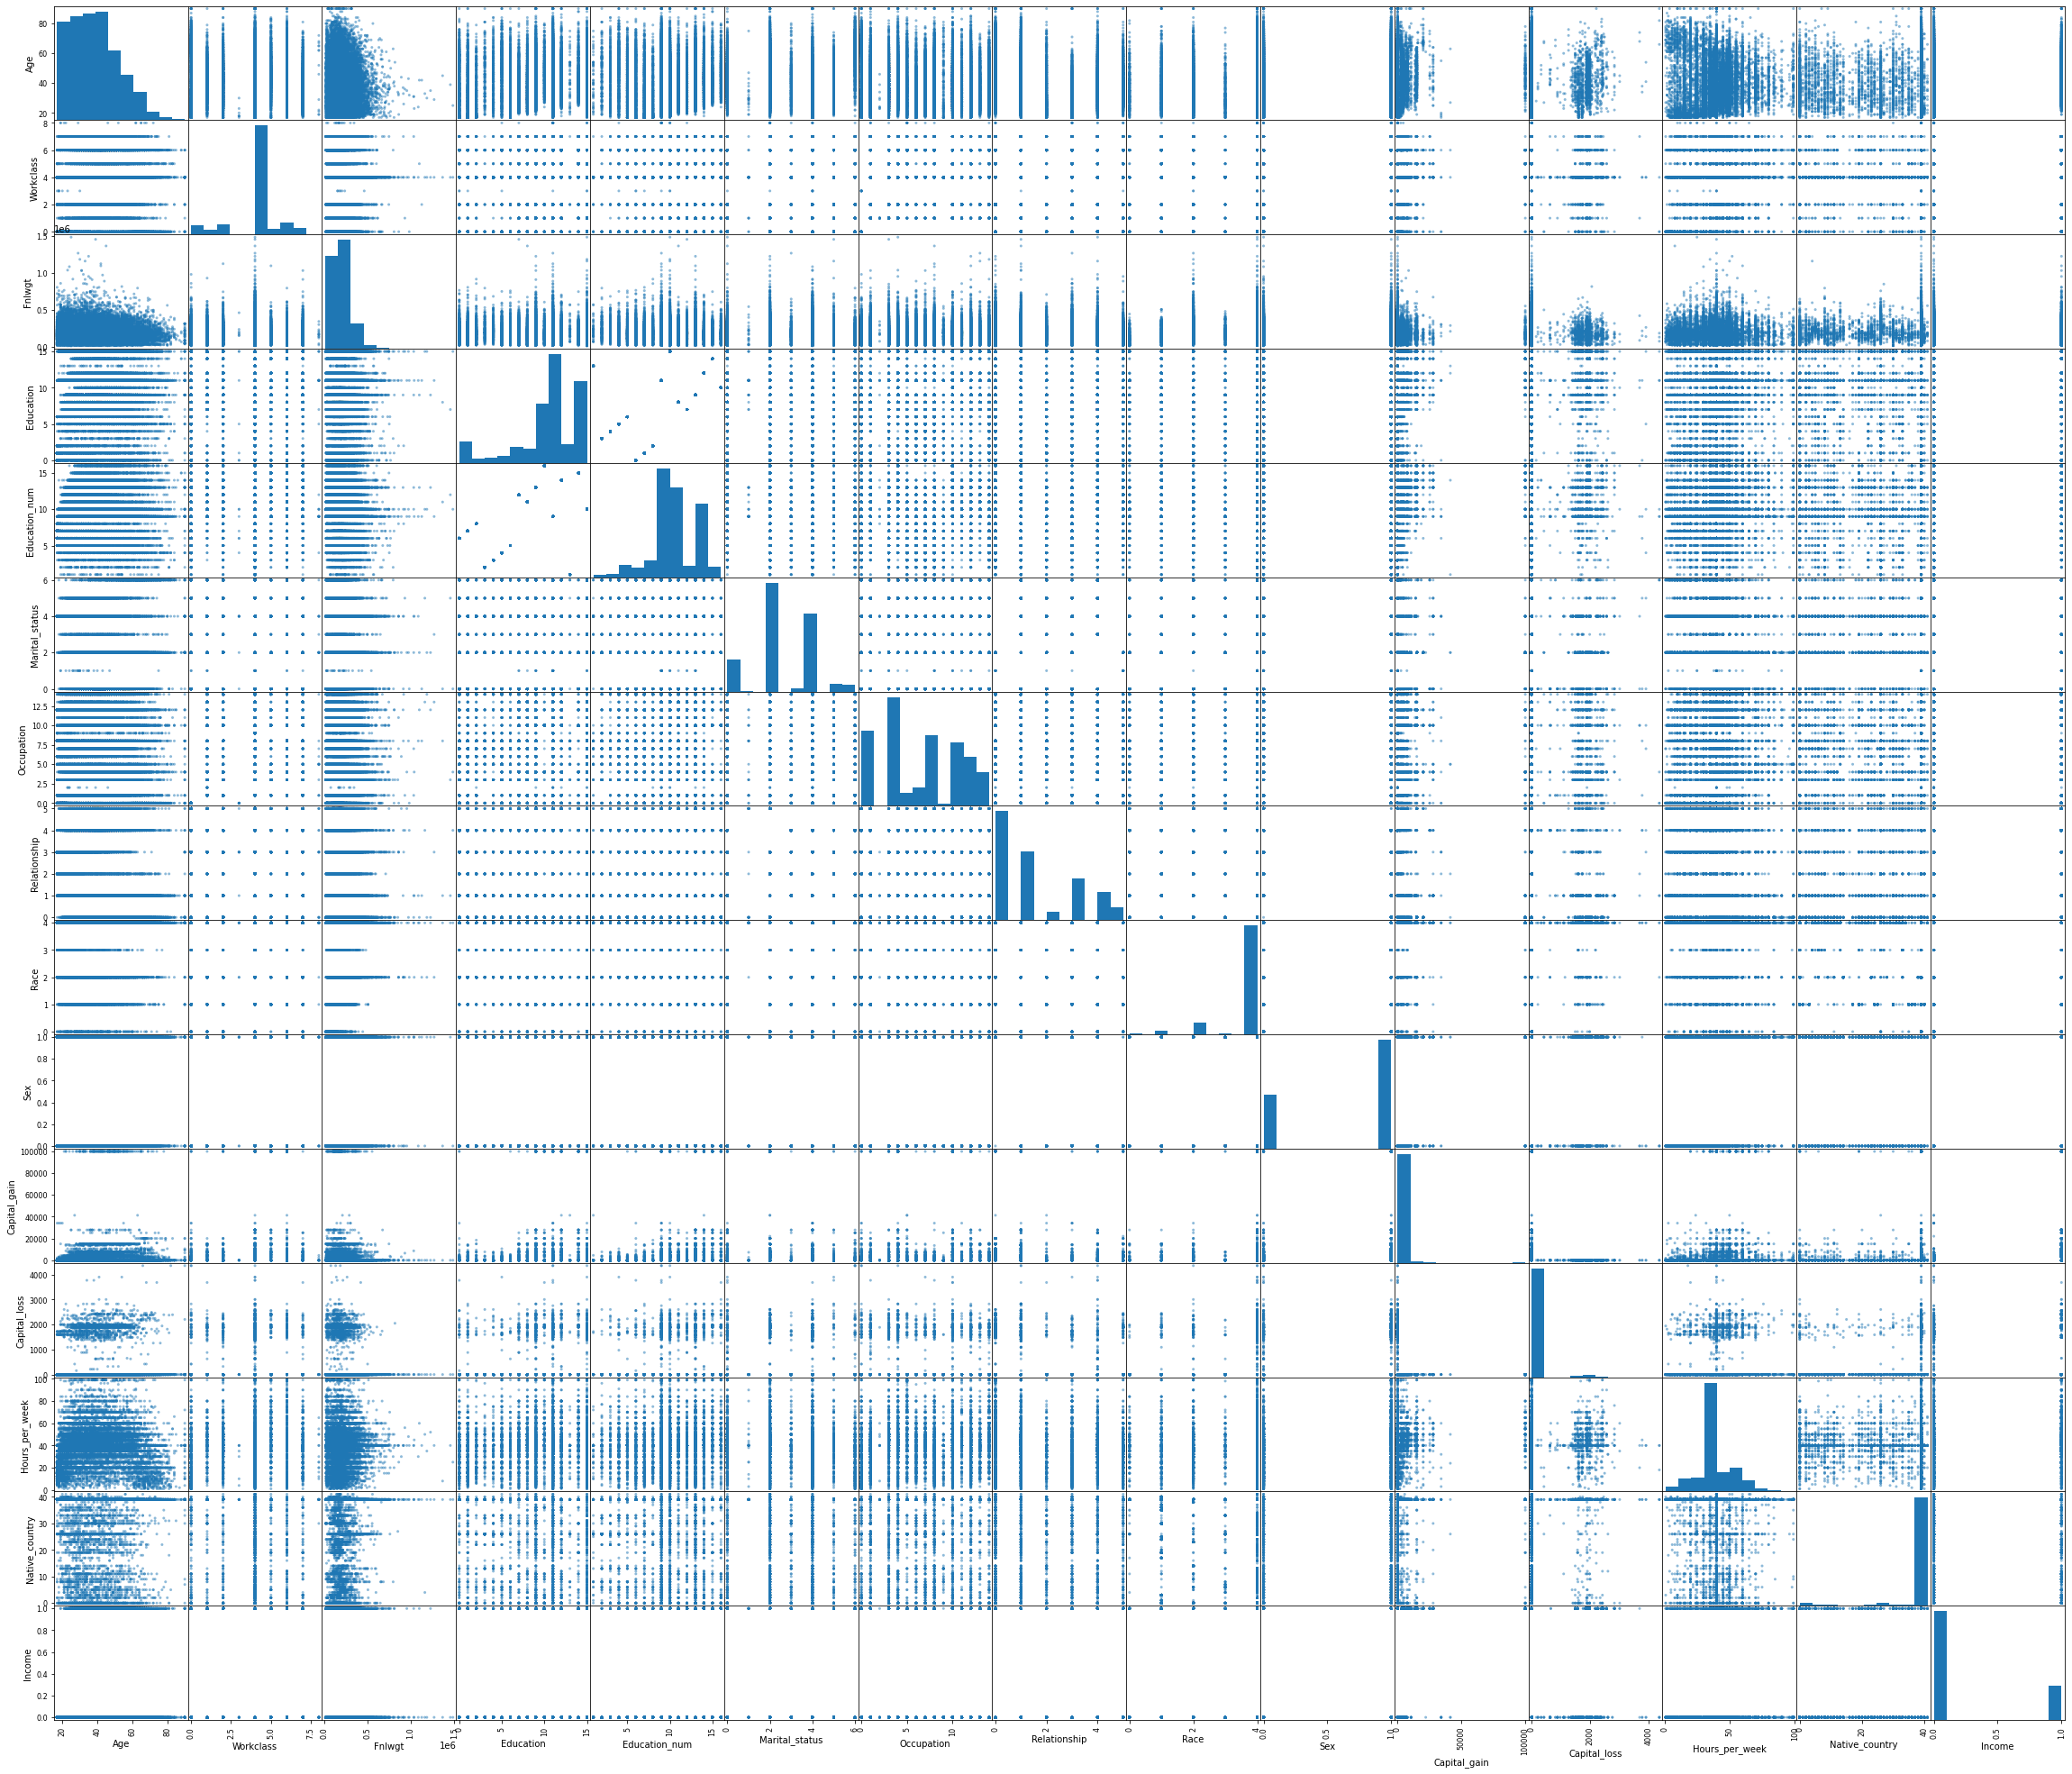

In [106]:
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
scatter_matrix(df, figsize=(40,35))
plt.show()

<AxesSubplot:>

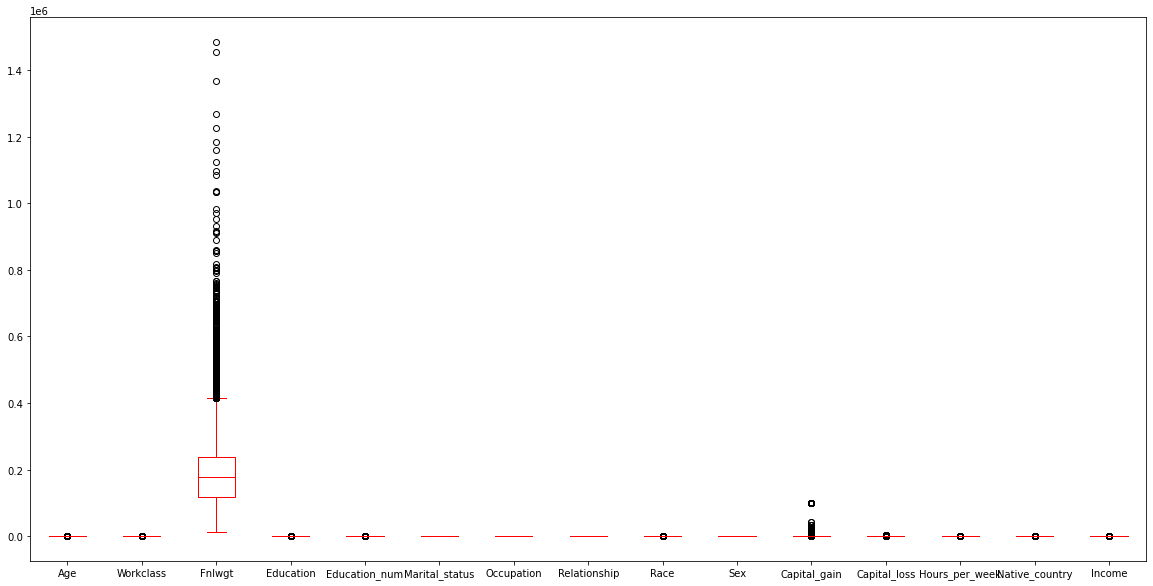

In [107]:
df.plot(kind='box', figsize=(20,10), color='r')

In [108]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

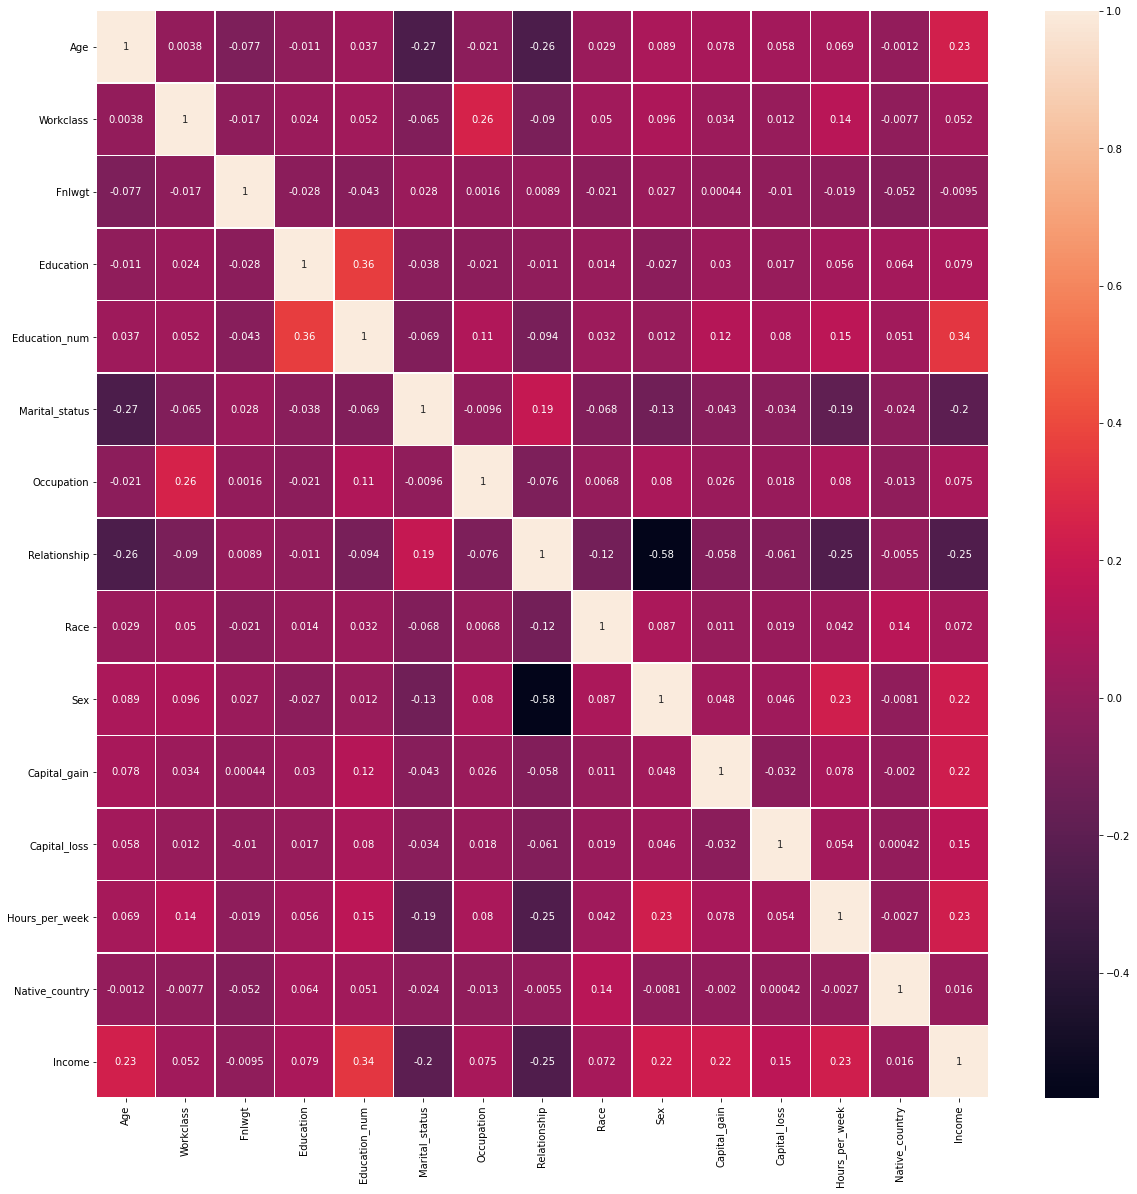

In [110]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(),annot=True, linewidth=0.5,)

In [120]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

In [121]:
from scipy.stats import zscore
import numpy as np

In [130]:
z_score=zscore(df[['Capital_gain','Capital_loss']])

In [131]:
abs_z_score=np.abs(z_score)

In [132]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [133]:
df=df[filtering_entry]

In [134]:
df.skew()

Age               0.577823
Workclass        -0.753032
Fnlwgt            0.622342
Education        -0.940587
Education_num    -0.288744
Marital_status   -0.053013
Occupation        0.134820
Relationship      0.735280
Race             -2.582270
Sex              -0.676359
Capital_gain      5.152957
Capital_loss      0.000000
Hours_per_week    0.223372
Native_country   -5.201903
Income            1.500256
dtype: float64

<AxesSubplot:>

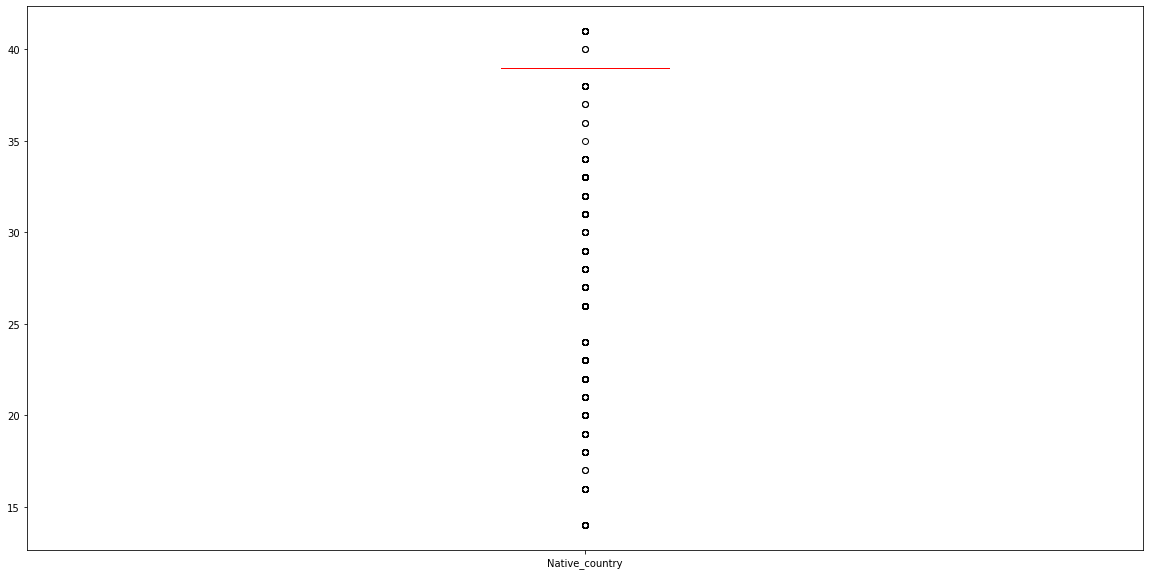

In [137]:
df['Native_country'].plot(kind='box', figsize=(20,10), color='r')

<AxesSubplot:>

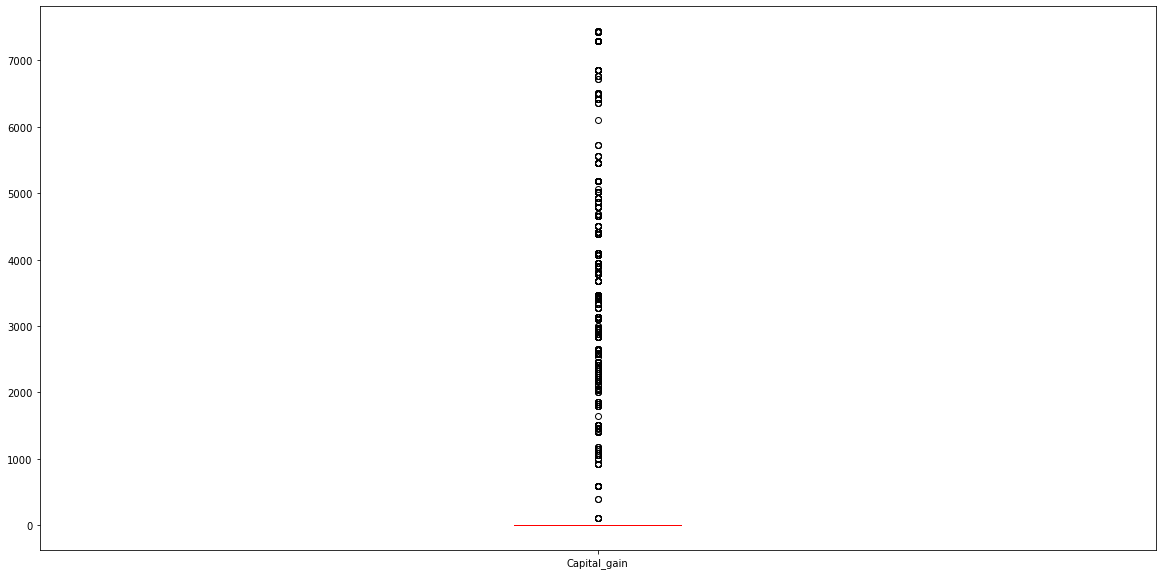

In [136]:
df['Capital_gain'].plot(kind='box', figsize=(20,10), color='r')

# EDA Concluding Remarks:
1. replaced all object to float.
2. No major correlation between the data given.
3. lot of outliers, reduced using zscore

# Pre-processing Pipeline

In [139]:
x=df.drop(columns='Income')
y=df['Income']

In [140]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.86402862,  1.46803883, -1.08495299, ...,  0.        ,
        -2.19729086,  0.20278454],
       [-0.0118072 ,  0.09674769,  0.30925005, ...,  0.        ,
        -0.00710675,  0.20278454],
       [ 1.08298758,  0.09674769,  0.51021293, ...,  0.        ,
        -0.00710675,  0.20278454],
       ...,
       [ 0.13416543,  0.09674769, -0.33627539, ...,  0.        ,
        -0.00710675,  0.20278454],
       [ 1.44791917,  0.09674769, -0.36223463, ...,  0.        ,
        -0.00710675,  0.20278454],
       [-1.1795883 ,  0.09674769,  0.16011083, ...,  0.        ,
        -1.62946535,  0.20278454]])

In [141]:
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [142]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)
           for i in range(x_scaled.shape[1])]
vif["feature"]=x.columns
vif

,vif,feature
0,1.163895,Age
1,1.095385,Workclass
2,1.031244,Fnlwgt
3,1.164917,Education
4,1.230369,Education_num
5,1.132732,Marital_status
6,1.092625,Occupation
7,1.656767,Relationship
8,1.049960,Race
9,1.533627,Sex


# Building Machine Learning Models

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

# Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [145]:
y_predict_test = classifier.predict(x_test)

In [146]:
cm = confusion_matrix(y_test, y_predict_test)
cm

array([[5209,  252],
       [ 907,  418]], dtype=int64)

In [147]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5461
           1       0.62      0.32      0.42      1325

    accuracy                           0.83      6786
   macro avg       0.74      0.63      0.66      6786
weighted avg       0.81      0.83      0.81      6786



In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
cross_val=cross_val_score(classifier, x,y,cv=7)
cross_val.mean()

0.7965222817812169

In [149]:
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid_search2 = GridSearchCV(classifier, param_grid=param)

In [150]:
grid_result = grid_search2.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)

Best Params:  {'C': 0.01}


In [151]:
regress=LogisticRegression(C=0.01)
regress.fit(x_train, y_train)

LogisticRegression(C=0.01)

In [152]:
y_predict_t = regress.predict(x_test)

In [153]:
accuracy_score(y_test, y_predict_t)

0.8287651046271736

In [154]:
print(classification_report(y_test, y_predict_t))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5461
           1       0.63      0.30      0.40      1325

    accuracy                           0.83      6786
   macro avg       0.74      0.63      0.65      6786
weighted avg       0.81      0.83      0.80      6786



Logistic regression= 83% accuracy

# Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [157]:
y_pr=clf.predict(x_test)

In [158]:
accuracy_score(y_test, y_pr)

0.8504273504273504

In [159]:
print(classification_report(y_test, y_pr))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5461
           1       0.65      0.50      0.57      1325

    accuracy                           0.85      6786
   macro avg       0.77      0.72      0.74      6786
weighted avg       0.84      0.85      0.84      6786



In [160]:
cm_ = confusion_matrix(y_test, y_pr)
cm_

array([[5105,  356],
       [ 659,  666]], dtype=int64)

In [161]:
cross_val=cross_val_score(clf, x,y,cv=7)
cross_val.mean()

0.8474748482688618

In [162]:
param_grid_1 = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5]
}

grid_search_1 = GridSearchCV(estimator = clf, param_grid = param_grid_1)

In [163]:
grid_result_1 = grid_search_1.fit(x_train, y_train)
print('Best Params: ', grid_result_1.best_params_)

Best Params:  {'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 4}


In [164]:
print('Best Score: ', grid_result_1.best_score_)

Best Score:  0.8550870622096298


In [165]:
rf=RandomForestClassifier(bootstrap= True, max_depth= 110, max_features= 3, min_samples_leaf= 4)

In [166]:
rf.fit(x_train, y_train)
y_pr1=rf.predict(x_test)

In [167]:
accuracy_score(y_test, y_pr1)

0.8626584143825523

In [168]:
print(classification_report(y_test, y_pr1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5461
           1       0.71      0.51      0.59      1325

    accuracy                           0.86      6786
   macro avg       0.80      0.73      0.75      6786
weighted avg       0.85      0.86      0.85      6786



Randon Forest accuracy= 86%

# Decision Tree

In [169]:
from sklearn.tree import DecisionTreeClassifier

In [170]:
tree=DecisionTreeClassifier()

In [171]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [172]:
tree.score(x_train,y_train)

0.9999508768482586

In [173]:
y_pred=tree.predict(x_test)

In [174]:
accuracy_score(y_test,y_pred)

0.800324196875921

In [175]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4766,  695],
       [ 660,  665]], dtype=int64)

In [177]:
cross_val=cross_val_score(tree,x,y,cv=5)
cross_val.mean()

0.7998747684485445

In [178]:
grid_param1={'criterion':['gini','entropy'], 'max_depth':range(10,15),
           'min_samples_split':range(3,10)}

In [179]:
grid_search1=GridSearchCV(tree, param_grid=grid_param1, cv=5)

In [180]:
grid_search1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'min_samples_split': range(3, 10)})

In [181]:
grid_result1 = grid_search1.fit(x_train, y_train)
print('Best Params: ', grid_result1.best_params_)

Best Params:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 8}


In [182]:
tree1=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split= 8)

In [183]:
tree1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=8)

In [184]:
tree1.score(x_train,y_train)

0.8672201208429533

In [185]:
y_pre=tree1.predict(x_test)

In [186]:
accuracy_score(y_test,y_pre)

0.8496905393457118

In [187]:
cm = confusion_matrix(y_test, y_pre)
cm

array([[5170,  291],
       [ 729,  596]], dtype=int64)

In [188]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5461
           1       0.67      0.45      0.54      1325

    accuracy                           0.85      6786
   macro avg       0.77      0.70      0.72      6786
weighted avg       0.84      0.85      0.84      6786



decision tree accuracy score= 85%

# KNN algorithm

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
knn=KNeighborsClassifier()

In [191]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [192]:
y_predict=knn.predict(x_test)

In [193]:
accuracy_score(y_test, y_predict)

0.8389330975537872

In [194]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[5002,  459],
       [ 634,  691]], dtype=int64)

In [195]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      5461
           1       0.60      0.52      0.56      1325

    accuracy                           0.84      6786
   macro avg       0.74      0.72      0.73      6786
weighted avg       0.83      0.84      0.83      6786



In [197]:
cross_val=cross_val_score(knn,x,y,cv=7)
cross_val.mean()

0.7778428745365507

In [198]:
param_grid ={'algorithm':['kd_tree','brute'] , 'leaf_size':[10,11,14,18,20,25,30]}

In [199]:
grid_search = GridSearchCV(knn, param_grid)
grid_search.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [10, 11, 14, 18, 20, 25, 30]})

In [200]:
grid_result = grid_search.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)

Best Params:  {'algorithm': 'kd_tree', 'leaf_size': 10}


In [201]:
kn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=10)

In [202]:
kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10)

In [203]:
y_predict1=kn.predict(x_test)

In [204]:
accuracy_score(y_test, y_predict1)

0.8389330975537872

In [205]:
cfm=confusion_matrix(y_test,y_predict1)
cfm

array([[5002,  459],
       [ 634,  691]], dtype=int64)

In [206]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      5461
           1       0.60      0.52      0.56      1325

    accuracy                           0.84      6786
   macro avg       0.74      0.72      0.73      6786
weighted avg       0.83      0.84      0.83      6786



In [207]:
print('Best Score: ', grid_result.best_score_)

Best Score:  0.8285114560364917


Knn accuracy= 84%

In [214]:
a=np.array(y_test)
lr=np.array(classifier.predict(x_test))
rf=np.array(clf.predict(x_test))
t=np.array(tree1.predict(x_test))
k=np.array(kn.predict(x_test))
df_census=pd.DataFrame({'original':a,'Predicted_lr':lr,'pred_rf':rf,'Pred_tree':tree1,'pred_knn':k})
df_census.head(10)

,original,Predicted_lr,pred_rf,Pred_tree,pred_knn
0,0,0,0,"DecisionTreeClassifier(criterion='entropy', ma...",0
1,0,0,0,"DecisionTreeClassifier(criterion='entropy', ma...",0
2,0,0,0,"DecisionTreeClassifier(criterion='entropy', ma...",0
3,1,1,1,"DecisionTreeClassifier(criterion='entropy', ma...",1
4,0,0,0,"DecisionTreeClassifier(criterion='entropy', ma...",0
5,1,0,0,"DecisionTreeClassifier(criterion='entropy', ma...",0
6,0,1,1,"DecisionTreeClassifier(criterion='entropy', ma...",0
7,0,0,0,"DecisionTreeClassifier(criterion='entropy', ma...",0
8,0,0,0,"DecisionTreeClassifier(criterion='entropy', ma...",0
9,0,0,0,"DecisionTreeClassifier(criterion='entropy', ma...",0


<AxesSubplot:>

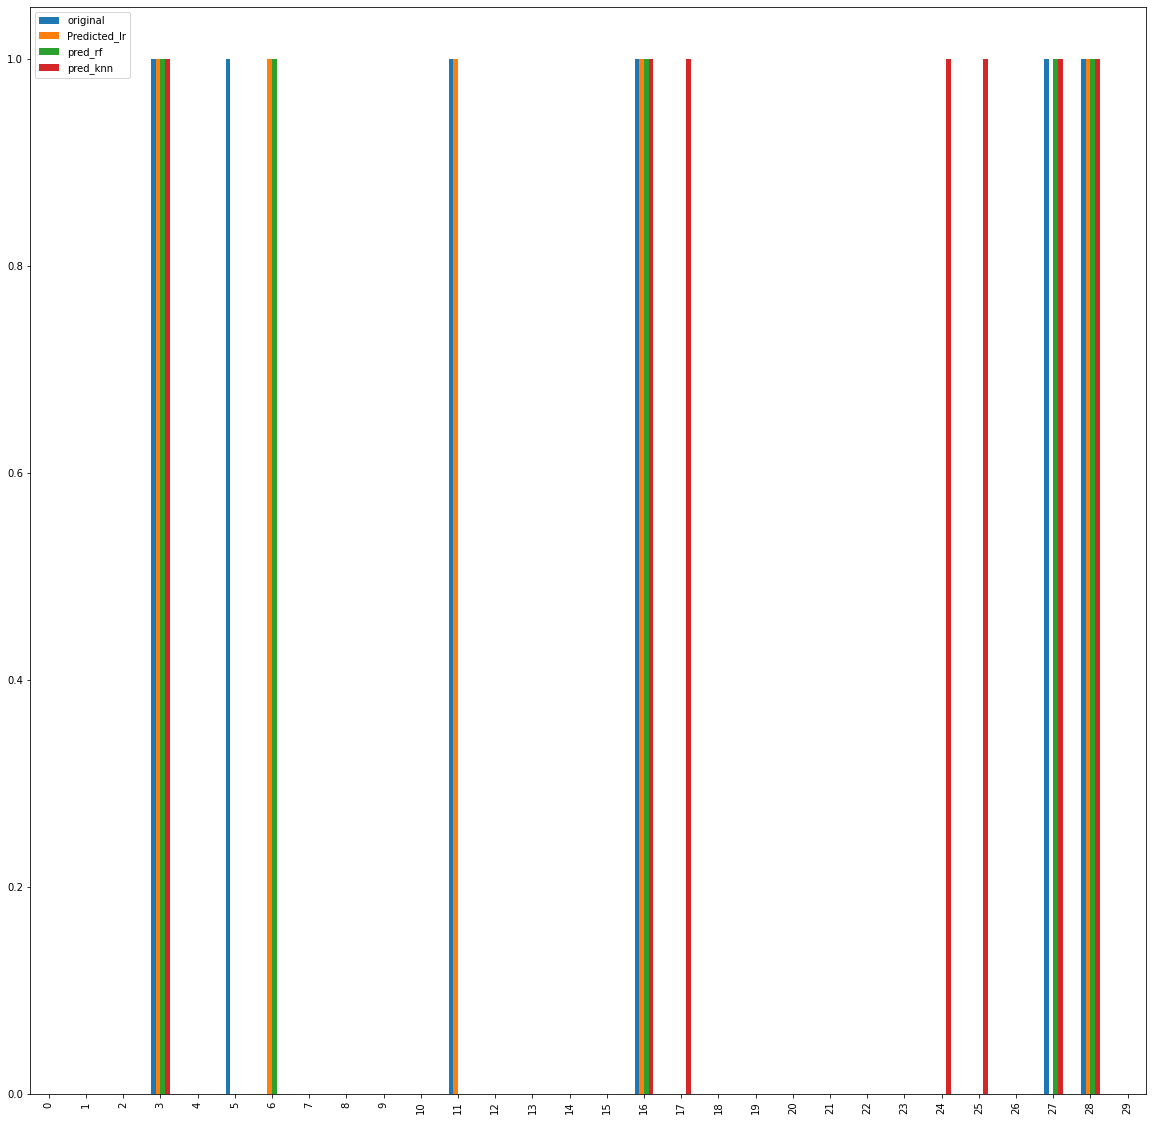

In [215]:
df_census.head(30).plot.bar(figsize=(20,20))

# Concluding Remark
Considering Random forest as best model as it gives maximum accuracy.

# Saving Model

In [216]:
import pickle
filename='Census Income Project.pickle'
pickle.dump(rf,open(filename,'wb'))